In [25]:
import pandas as pd
import os

## ShARe dataset

In [ ]:
df = pd.read_stata('..\data\external\sharew9_rel9-0-0_ph.dta')
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12924\1506680455.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_stata('..\data\external\sharew9_rel9-0-0_ph.dta')


,mergeid,hhid9,mergeidp9,coupleid9,country,language,ph003_,ph004_,ph005_,ph006d1,...,ph089d2,ph089d3,ph089d4,ph089dno,ph095_,ph690d1,ph690d2,ph690d3,ph690d4,ph745_
0,AT-000787-01,AT-000787-A,AT-000787-02,AT-000787-01-02,Austria,German (at),Very good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,Yes
1,AT-001492-01,AT-001492-A,AT-001492-02,AT-001492-01-02,Austria,German (at),Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Selected,Not selected,No
2,AT-001492-02,AT-001492-A,AT-001492-01,AT-001492-01-02,Austria,German (at),Excellent,Yes,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,2.0,Selected,Not selected,Selected,Not selected,No
3,AT-001719-01,AT-001719-A,AT-001719-02,AT-001719-01-02,Austria,German (at),Poor,Yes,Severely limited,Selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
4,AT-001719-02,AT-001719-A,AT-001719-01,AT-001719-01-02,Austria,German (at),Fair,Yes,"Limited, but not severely",Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69442,SK-992332-01,SK-992332-A,SK-992332-02,SK-992332-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
69443,SK-992332-02,SK-992332-A,SK-992332-01,SK-992332-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
69444,SK-995042-01,SK-995042-A,SK-995042-02,SK-995042-01-02,Slovakia,Slovakian,Poor,Yes,Severely limited,Selected,...,Selected,Selected,Selected,Not selected,8.0,Selected,Not selected,Not selected,Not selected,No
69445,SK-995042-02,SK-995042-A,SK-995042-01,SK-995042-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Selected,Not selected,NaN,Selected,Not selected,Not selected,Not selected,No


## CADEC dataset

### Read files to pandas df

In [ ]:
path = "..//data//external//cadec//original"
dir_list = os.listdir(path)

['ARTHROTEC.1.ann', 'ARTHROTEC.10.ann', 'ARTHROTEC.100.ann', 'ARTHROTEC.101.ann', 'ARTHROTEC.102.ann', 'ARTHROTEC.103.ann', 'ARTHROTEC.104.ann', 'ARTHROTEC.105.ann', 'ARTHROTEC.106.ann', 'ARTHROTEC.107.ann', 'ARTHROTEC.108.ann', 'ARTHROTEC.109.ann', 'ARTHROTEC.11.ann', 'ARTHROTEC.110.ann', 'ARTHROTEC.111.ann', 'ARTHROTEC.112.ann', 'ARTHROTEC.113.ann', 'ARTHROTEC.114.ann', 'ARTHROTEC.115.ann', 'ARTHROTEC.116.ann', 'ARTHROTEC.117.ann', 'ARTHROTEC.118.ann', 'ARTHROTEC.119.ann', 'ARTHROTEC.12.ann', 'ARTHROTEC.120.ann', 'ARTHROTEC.121.ann', 'ARTHROTEC.122.ann', 'ARTHROTEC.123.ann', 'ARTHROTEC.124.ann', 'ARTHROTEC.125.ann', 'ARTHROTEC.126.ann', 'ARTHROTEC.127.ann', 'ARTHROTEC.128.ann', 'ARTHROTEC.129.ann', 'ARTHROTEC.13.ann', 'ARTHROTEC.130.ann', 'ARTHROTEC.131.ann', 'ARTHROTEC.132.ann', 'ARTHROTEC.133.ann', 'ARTHROTEC.134.ann', 'ARTHROTEC.135.ann', 'ARTHROTEC.136.ann', 'ARTHROTEC.137.ann', 'ARTHROTEC.138.ann', 'ARTHROTEC.139.ann', 'ARTHROTEC.14.ann', 'ARTHROTEC.140.ann', 'ARTHROTEC.141.ann'

In [49]:
cadec_df = pd.concat((pd.read_csv(f'{path}//{f}', sep='\t', names=['tag_number', 'entity_type_offsets', 'text']) for f in dir_list), ignore_index=True)
cadec_df

,tag_number,entity_type_offsets,text
0,T1,ADR 9 19,bit drowsy
1,#1,AnnotatorNotes T1,Drowsy
2,T2,ADR 29 50,little blurred vision
3,#2,AnnotatorNotes T2,Blurred Vision
4,T3,Drug 93 102,Arthrotec
...,...,...,...
9681,T6,Symptom 241 251,Lupus pain
9682,T7,Symptom 294 323,pain from the herniated discs
9683,T10,Finding 397 408,disc issues
9684,T8,Drug 528 534,Zipsor


In [ ]:
cadec_df.entity_type_offsets = cadec_df.entity_type_offsets.str.split().str.get(0)      # Extract entity types from entity_type_offsets
cadec_df = cadec_df.rename(columns={"entity_type_offsets": "entity_type"})              # Rename column
cadec_df = cadec_df[ -cadec_df.tag_number.str.startswith('#')]                          # Remove annotation notes
cadec_df = cadec_df[['entity_type', 'text']]                                            # Leave only 'entity_type' and 'text' columns
cadec_df = cadec_df.reset_index(drop=True)                                              # Reset index
cadec_df

,entity_type,text
0,ADR,bit drowsy
1,ADR,little blurred vision
2,Drug,Arthrotec
3,Disease,arthritis
4,Symptom,agony
...,...,...
9106,Symptom,Lupus pain
9107,Symptom,pain from the herniated discs
9108,Finding,disc issues
9109,Drug,Zipsor


### Examine cadec dataset

In [56]:
print(cadec_df.isna().sum())
print(cadec_df.isnull().sum())

entity_type    0
text           0
dtype: int64
entity_type    0
text           0
dtype: int64


In [52]:
cadec_df.entity_type.value_counts()

entity_type
ADR        6318
Drug       1800
Finding     435
Disease     283
Symptom     275
Name: count, dtype: int64

## Cosine similarity

In [ ]:
import numpy as np   

def cosine(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

## Load embeddings
https://nlp.stanford.edu/projects/glove/

In [68]:
def load_embeddings(path):
    mapping = dict()
    
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if len(line) == 0:
                continue
            splitted = line.split(" ")
            mapping[splitted[0]] = np.array(splitted[1:], dtype=float)
    return mapping

mapping = load_embeddings('..\data\external\glove.6B.50d.txt')

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12924\2635219672.py:13: SyntaxWarning: invalid escape sequence '\d'
  mapping = load_embeddings('..\data\external\glove.6B.50d.txt')


## Text to embeddings
Average vector of word vectors in a text.

In [69]:
import nltk
nltk.download('punkt') #https://www.nltk.org/data.html

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
from nltk.tokenize import word_tokenize

def document_to_avg_embedding(doc, embeddings):
    
    doc_embeddings = []
    doc = str.lower(doc)
    tokens = word_tokenize(doc)

    for token in tokens:
        if token in embeddings.keys():
            doc_embeddings.append(embeddings[token])
    
    avg_embedding = np.mean(np.array(doc_embeddings), axis=0)

    return avg_embedding

## Cosine similarity between docs

In [ ]:
def cosine_sim_between_docs(doc1, doc2, embeddings, verbose=False):

    v1 = document_to_avg_embedding(doc1, embeddings)
    v2 = document_to_avg_embedding(doc2, embeddings)

    # If there is no embedings for a doc, return 0.0 (a != a returns true for NaNs).
    try: any(v1 != v1)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc1}.')
        return 0.0
    
    try: any(v2 != v2)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc2}.')
        return 0.0
    
    cosine_sim = cosine(v1, v2)


    if verbose:
        print(f'Cosine similarity between {doc1} and {doc2} is:\n{cosine_sim}\n')

    return cosine_sim

Below results are not promising, however I must to test it on bigger dataset.

In [117]:
cosine_sim_between_docs("Mary had a little lamb", "A girl had a small sheep", mapping, verbose=True) #0.8991286073011774
cosine_sim_between_docs("Mary had a little lamb", "This old man, he played one", mapping, verbose=True) #0.906964976899118
cosine_sim_between_docs("Mary had a little lamb", "Twinkle Twinkle Little Star How I wonder what you are!", mapping, verbose=True) #0.7681287321680009
cosine_sim_between_docs("Mary had a little lamb", "Your STIHL earth auger uses an oil-gasoline mixture for fuel (see the chapter on Fuel in your owner's manual).", mapping, verbose=True) #0.8210465662463234

Cosine similarity between Mary had a little lamb and A girl had a small sheep is:
0.8991286073011774

Cosine similarity between Mary had a little lamb and This old man, he played one is:
0.906964976899118

Cosine similarity between Mary had a little lamb and Twinkle Twinkle Little Star How I wonder what you are! is:
0.7681287321680009

Cosine similarity between Mary had a little lamb and Your STIHL earth auger uses an oil-gasoline mixture for fuel (see the chapter on Fuel in your owner's manual). is:
0.8210465662463234



0.8210465662463234

### Tests on CADEC

In [118]:
cadec_grouped = cadec_df.groupby('entity_type')
cadec_sample = cadec_grouped.sample(n=5, random_state=379).reset_index(drop=True)

type_dict = {'ADR':0, 'Disease':1, 'Drug':2, 'Finding':3, 'Symptom':4}
cadec_sample.entity_type = cadec_sample.entity_type.map(type_dict)
cadec_sample.head(10)

,entity_type,text
0,0,irretractable lower back pain
1,0,muscle weakness causing nerve damage and imbal...
2,0,irritable
3,0,BP was extrememly high
4,0,decreased stamina
5,1,rheumatoid arthritis
6,1,osteoarthritis
7,1,hypothyroidism
8,1,diabetes
9,1,Thyroid disease


In [ ]:
similarity_matrix = np.zeros((5,5))
count_matrix = np.zeros((5,5))

for index_i, row_i in cadec_sample.iterrows():
    for index_j, row_j in cadec_sample.iterrows():
        
        # Do not calculate simmilarities for the same entities
        # to not overestimate the score within the same group.
        if index_i != index_j:
            similarity_matrix[row_i.entity_type][row_j.entity_type] += cosine_sim_between_docs(row_i.text, row_j.text, mapping, verbose=False)
            count_matrix[row_i.entity_type][row_j.entity_type] += 1

similarity_matrix /= count_matrix
similarity_matrix = similarity_matrix
print(similarity_matrix)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[0.4288865  0.34960529 0.16572748 0.43556236 0.50739184]
 [0.34960529 0.6615323  0.25225776 0.39261589 0.52259857]
 [0.16572748 0.25225776 0.27452607 0.17844408 0.19748069]
 [0.43556236 0.39261589 0.17844408 0.34846547 0.49877721]
 [0.50739184 0.52259857 0.19748069 0.49877721 0.63420437]]


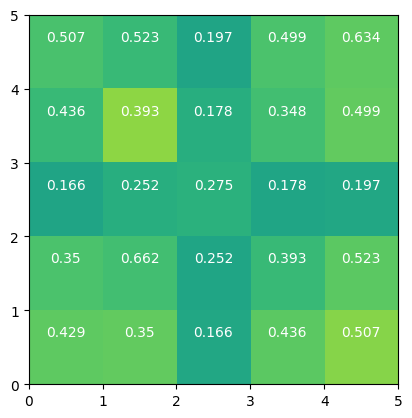

In [128]:
import matplotlib.pyplot as plt

plt.imshow(similarity_matrix, vmin=-1, vmax=1, extent=[0, 5, 0, 5]) 
for i in range(5): 
    for j in range(5): 
        plt.annotate(str(round(similarity_matrix[i][j], 3)),
                     xy=(j+0.5, i+0.7), 
                     ha='center', va='center', color='white') 
        
plt.show()